<a href="https://colab.research.google.com/github/mohansivasai/SVHN-dataset/blob/master/SVHN-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset

### Let's get started!

We'll start by running some imports, and loading the dataset.

In [ ]:
import tensorflow as tf
from scipy.io import loadmat

In [ ]:
#importing dependicies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Activation
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,CSVLogger,Callback
from tensorflow.keras.optimizers import Adam,RMSprop,SGD


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.


In [ ]:
# Getting the data - 
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
#cant able to load through drive so found an other way

--2020-09-12 09:46:12--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  17.5MB/s    in 9.5s    

2020-09-12 09:46:22 (18.2 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-09-12 09:46:22--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  55.4MB/s    in 1.1s    

2020-09-12 09:46:23 (55.4 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [ ]:
# Run this cell to load the dataset

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extracting the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Selecting a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Converting the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Selecting a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

In [ ]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (32, 32, 3, 73257)
Shape of y_train: (73257, 1)
Shape of X_test: (32, 32, 3, 26032)
Shape of y_test: (26032, 1)


In [ ]:
#Reshaping the images
X_train = np.moveaxis(X_train,-1,0)
X_test = np.moveaxis(X_test,-1,0)
print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)

shape of X_train: (73257, 32, 32, 3)
shape of X_test: (26032, 32, 32, 3)


In [ ]:
y_train = np.where(y_train==10,0,y_train)
y_test = np.where(y_test == 10,0,y_test)

In [ ]:
print(np.min(y_train),end=' - ')
print(np.max(y_train))
print(np.min(y_test),end=' - ')
print(np.max(y_test))

0 - 9
0 - 9


[0]


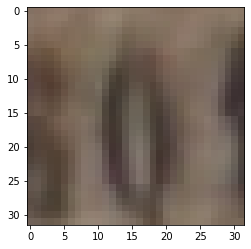

In [ ]:
plt.imshow(X_train[52])
print(y_train[52])

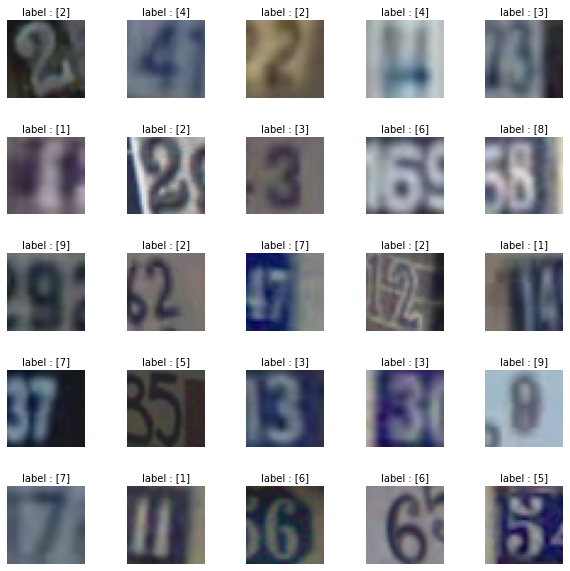

In [ ]:
# Plotting the colored images
W_grid = 5
L_grid = 5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
n_training = len(X_train)
for i in range(0,W_grid*L_grid):
    idx = np.random.randint(0,n_training)
    axes[i].imshow(X_train[idx])
    axes[i].set_title('label : '+str(y_train[idx]),fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
# Converting to grayscale and normalizing the images
X_train_gray = np.expand_dims(np.mean(X_train/255,axis=3),axis =3)
X_test_gray = np.expand_dims(np.mean(X_test/255,axis = 3),axis=3)
#X_train_gray  = np.sum(X_train/3,axis=3,keepdims= True)/255
#X_test_gray  = np.sum(X_test/3,axis=3,keepdims= True)/255

In [ ]:
print("shape of X_train_gray:",X_train_gray.shape)
print("shape of X_test_gray:",X_test_gray.shape)
print("minimun pixel value :",np.min(X_train_gray))
print("maximum pixel value :",np.max(X_train_gray))

shape of X_train_gray: (73257, 32, 32, 1)
shape of X_test_gray: (26032, 32, 32, 1)
minimun pixel value : 0.0
maximum pixel value : 1.0


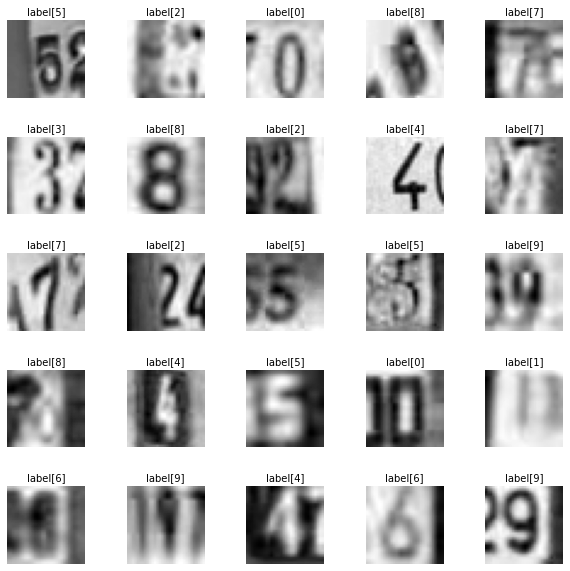

In [ ]:
#Plotting the gray images
W_grid = 5
L_grid = 5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
n_training = len(X_train_gray)
for i in range(0,W_grid*L_grid):
    idx = np.random.randint(0,n_training)
    axes[i].imshow(X_train_gray[idx].squeeze(),cmap='gray')
    axes[i].set_title('label'+str(y_train[idx]),fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
#Shuffling the dataset
from sklearn.utils import shuffle
X_train_gray, y_train = shuffle(X_train_gray, y_train)

In [ ]:
# Splitting the Data into Train and Validation sets
from sklearn.model_selection import train_test_split
X_training,X_val,y_training,y_val = train_test_split(X_train_gray,y_train,test_size =0.12)

## 2. MLP neural network classifier


In [ ]:
def get_model_mlp(input_shape):
  model = Sequential([
                    Flatten(input_shape=input_shape),
                    Dense(256,activation='relu'),
                    Dense(256,activation='relu'),
                    Dense(512,activation='relu'),
                    Dense(1024,activation='relu'),
                    Dense(10,activation='softmax')])
  return model


mlp_model = get_model_mlp(X_train_gray[0].shape)

mlp_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                10250     
Total params: 995,338
Trainable params: 995,338
Non-trainable params: 0
_______________________________________________

In [ ]:
#compiling the model
mlp_model.compile(optimizer=Adam(learning_rate=0.002),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#custom callback
class Traincallback(Callback):
    def on_train_begin(self,logs={}):
        print("started model training!")
    def on_train_end(self,logs={}):
        print("Model finished training!!")
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('loss') < 1.0):
            print("\n reached the given desied loss")

In [ ]:
# Callbacks
checkpoint_path_mlp = 'my_model_mlp/checkpoint'
checkpoint_mlp = ModelCheckpoint(checkpoint_path_mlp,save_freq='epoch',save_weights_only=True,save_best_only= True,verbose=0)
csv_log_mlp = CSVLogger('my_model_mlp.csv')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,patience=5,verbose=1,model='max')
early_stopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1)
callbacks = [checkpoint_mlp,csv_log_mlp,reduce_lr,early_stopping,Traincallback()]

In [ ]:
# Training the MLP model
history_mlp = mlp_model.fit(X_training,y_training,batch_size=128,epochs=30,validation_data=(X_val,y_val),verbose=1,callbacks=callbacks)

started model training!
Epoch 1/30
504/504 [==============================] - 2s 3ms/step - loss: 1.9122 - accuracy: 0.3170 - val_loss: 1.5810 - val_accuracy: 0.4358
Epoch 2/30
504/504 [==============================] - 2s 3ms/step - loss: 1.3648 - accuracy: 0.5409 - val_loss: 1.1494 - val_accuracy: 0.6322
Epoch 3/30
504/504 [==============================] - 2s 3ms/step - loss: 1.1334 - accuracy: 0.6334 - val_loss: 1.1316 - val_accuracy: 0.6347
Epoch 4/30
504/504 [==============================] - 2s 3ms/step - loss: 1.0168 - accuracy: 0.6769 - val_loss: 0.9624 - val_accuracy: 0.6914
Epoch 5/30
496/504 [============================>.] - ETA: 0s - loss: 0.9424 - accuracy: 0.7004
 reached the given desied loss
504/504 [==============================] - 2s 3ms/step - loss: 0.9417 - accuracy: 0.7003 - val_loss: 0.9136 - val_accuracy: 0.7031
Epoch 6/30
491/504 [============================>.] - ETA: 0s - loss: 0.8874 - accuracy: 0.7190
 reached the given desied loss
504/504 [==============

In [ ]:
#Ploting the Accuracy and loss

def plot_graps(history):
  acc = history.history['accuracy']
  loss= history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs,acc,'r',label='training accuracy')
  plt.plot(epochs,val_acc,'b',label='validation accuracy')
  plt.title("Training and Validation accuracy ")
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'r',label='training loss')
  plt.plot(epochs,val_loss,'b',label='validation loss')
  plt.title("Training and Validation Loss ")
  plt.legend()

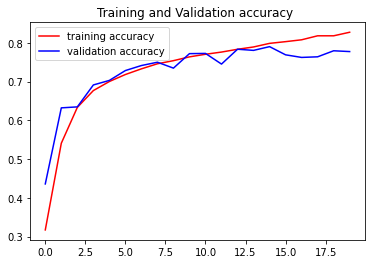

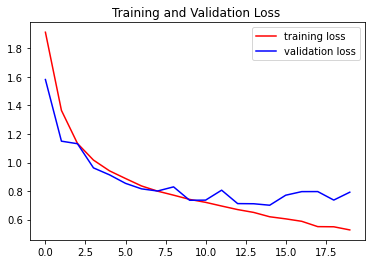

In [ ]:
#Plotting the accuracy and loss of MLP model
plot_graps(history_mlp)

In [ ]:
# Evaluation of MLP model on test set
test_loss,test_accuracy = mlp_model.evaluate(X_test_gray,y_test,verbose=0,batch_size=32)
print("Test loss:",test_loss)
print("Test accuracy:",test_accuracy)

Test loss: 0.9282388091087341
Test accuracy: 0.7497311234474182


In [ ]:
# CSV logger callback in MLP
mlp_df = pd.read_csv('/content/my_model_mlp.csv')
mlp_df

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.317004,1.912223,0.435787,1.580966
1,1,0.540874,1.364845,0.632237,1.149416
2,2,0.633435,1.133383,0.634740,1.131576
3,3,0.676868,1.016807,0.691389,0.962364
4,4,0.700292,0.941658,0.703105,0.913629
5,5,0.718363,0.887979,0.728586,0.854069
6,6,0.732991,0.835813,0.741554,0.815486
7,7,0.746083,0.799428,0.750085,0.800422
8,8,0.754134,0.771314,0.734842,0.829401
9,9,0.763953,0.741692,0.772267,0.735637


In [ ]:
!ls -lh my_model_mlp

total 12M
-rw-r--r-- 1 root root   77 Sep 12 10:50 checkpoint
-rw-r--r-- 1 root root  12M Sep 12 10:50 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.5K Sep 12 10:50 checkpoint.index


## 3. CNN neural network classifier


In [ ]:
def get_model_cnn(input_shape):
  model = Sequential([
                      Conv2D(32,3,padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu',input_shape=input_shape),
                      MaxPooling2D(2,2),
                      Conv2D(64,3,activation='relu'),
                      MaxPooling2D(2),
                      BatchNormalization(),
                      Flatten(),
                      Dense(512,activation='relu'),
                      Dropout(0.5),
                      Dense(128,activation='relu'),
                      Dense(10,activation='softmax')])
  return model


cnn_model = get_model_cnn(X_train_gray[0].shape)
cnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)             

In [ ]:
#compiling the model
cnn_model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#calbacks
checkpoint_path_cnn = 'my_model_cnn/checkpoint_CNN'
checkpoint_CNN = ModelCheckpoint(checkpoint_path_cnn,save_freq='epoch',save_weights_only=True,save_best_only=True,verbose=0)
csv_log_cnn = CSVLogger('my_model_cnn.csv')

In [ ]:
# Trining the CNN model
history_cnn = cnn_model.fit(X_training,y_training,epochs=30,batch_size=64,validation_data =(X_val,y_val) ,verbose=1,callbacks=[checkpoint_CNN,reduce_lr,early_stopping,csv_log_cnn])

Epoch 1/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.7510 - accuracy: 0.7657 - val_loss: 0.5101 - val_accuracy: 0.8468
Epoch 2/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.4565 - accuracy: 0.8632 - val_loss: 0.4013 - val_accuracy: 0.8815
Epoch 3/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3858 - accuracy: 0.8837 - val_loss: 0.3988 - val_accuracy: 0.8822
Epoch 4/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3472 - accuracy: 0.8929 - val_loss: 0.4148 - val_accuracy: 0.8809
Epoch 5/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3167 - accuracy: 0.9035 - val_loss: 0.3938 - val_accuracy: 0.8926
Epoch 6/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.2905 - accuracy: 0.9118 - val_loss: 0.3342 - val_accuracy: 0.9024
Epoch 7/30
1008/1008 [==============================] - 4s 4ms/step - loss: 0.2691 - accuracy: 0.9179 - val_loss: 0.3843 - val_accuracy:

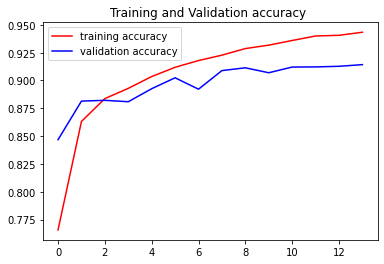

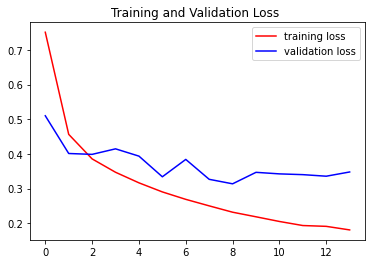

In [ ]:
#Ploting the Accuracy and loss
plot_graps(history_cnn)

In [ ]:
# Evaluation of CNN model on test set
test_loss,test_accuracy = cnn_model.evaluate(X_test_gray,y_test,verbose=0,batch_size=64)
print("Test loss:",test_loss)
print("Test accuracy:",test_accuracy)

Test loss: 0.37501096725463867
Test accuracy: 0.9051167964935303


In [ ]:
#CSV logger callback on CNN model
cnn_df = pd.read_csv('/content/my_model_cnn.csv')
cnn_df

,epoch,accuracy,loss,lr,val_accuracy,val_loss
0,0,0.765690,0.750979,0.001,0.846775,0.510136
1,1,0.863168,0.456546,0.001,0.881470,0.401337
2,2,0.883706,0.385756,0.001,0.882152,0.398826
3,3,0.892920,0.347225,0.001,0.880901,0.414770
4,4,0.903546,0.316727,0.001,0.892617,0.393757
5,5,0.911845,0.290543,0.001,0.902400,0.334183
6,6,0.917910,0.269102,0.001,0.892162,0.384279
7,7,0.922750,0.250335,0.001,0.908884,0.326883
8,8,0.928676,0.232050,0.001,0.911387,0.313913
9,9,0.931747,0.218808,0.001,0.906950,0.347031


In [ ]:
!ls -lh my_model_cnn

total 20M
-rw-r--r-- 1 root root   85 Sep 12 10:53 checkpoint
-rw-r--r-- 1 root root  20M Sep 12 10:53 checkpoint_CNN.data-00000-of-00001
-rw-r--r-- 1 root root 3.0K Sep 12 10:53 checkpoint_CNN.index


## 4. Getting model predictions
* Loading the best weights for the MLP and CNN models that you saved during the training run.
* Randomly selecting 5 images and corresponding labels from the test set and displaying the images with their labels.
* Alongside the image and label, showing each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
# MLP model
mlp = get_model_mlp(X_train_gray[0].shape)
mlp.load_weights(checkpoint_path_mlp)

In [ ]:
# CNN model
cnn = get_model_cnn(X_train_gray[0].shape)
cnn.load_weights(checkpoint_path_cnn)

In [ ]:
def model_predictions(model,X_test_gray,y_test):
  num_test_images = X_test_gray.shape[0]

  random_inx = np.random.choice(num_test_images, 5)
  random_test_images = X_test_gray[random_inx, ...]
  random_test_labels = y_test[random_inx, ...]

  predictions = model.predict(random_test_images)

  fig, axes = plt.subplots(5, 2, figsize=(16, 12))
  fig.subplots_adjust(hspace=0.4, wspace=-0.2)

  for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
  plt.show()


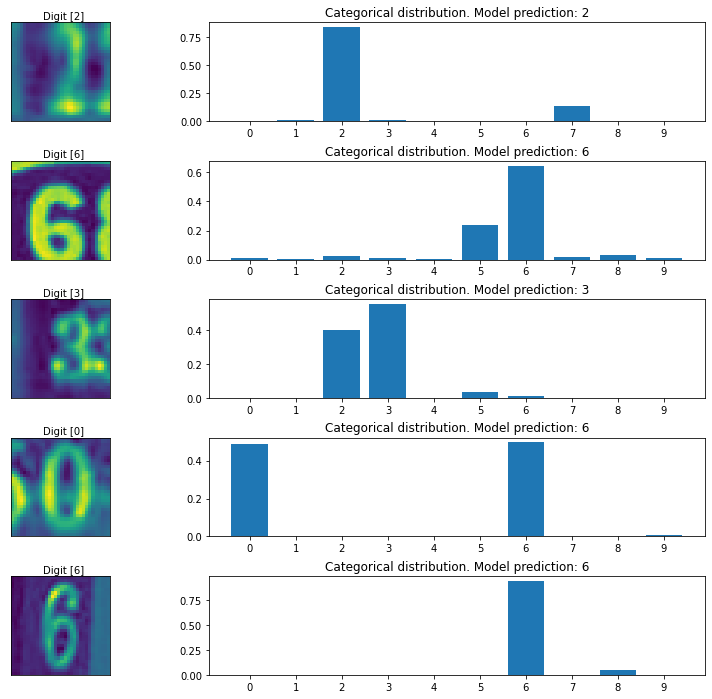

In [ ]:
model_predictions(mlp,X_test_gray,y_test)

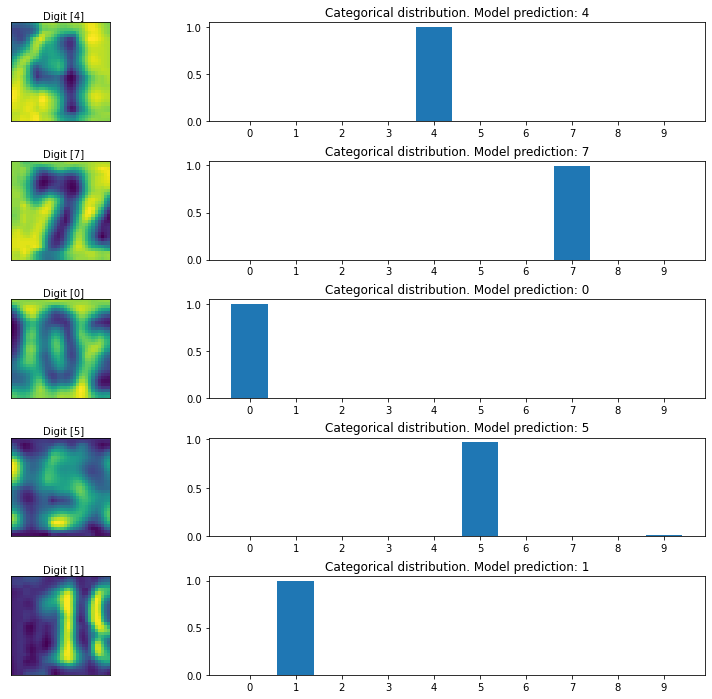

In [ ]:
model_predictions(cnn,X_test_gray,y_test)